In [110]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [62]:
y = data.pop('label')

In [76]:
y = y.reshape((42000,1))

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [78]:
x = data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
x = data.values
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

7


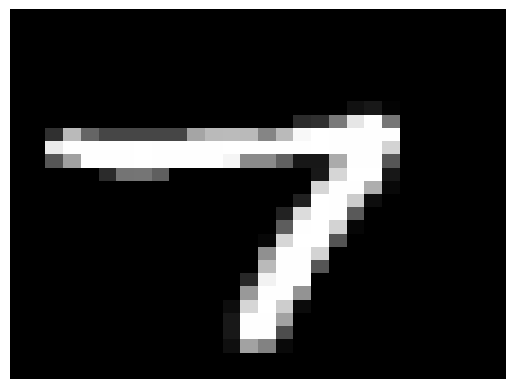

In [109]:
print(y[4200,0])
test = x[4200].reshape(28,28)
plt.imshow(test, cmap='gray', aspect='auto')
plt.axis('off')  # Turn off axis labels
plt.show()

In [118]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='linear'),
],   name = 'my_model'
)

In [119]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                19625     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)
history = model.fit(
    x,y,
    epochs=40
)

Epoch 1/40

1313/1313 [==============================] - 3s 2ms/step - loss: 2.4929
Epoch 2/40
1313/1313 [==============================] - 2s 2ms/step - loss: 1.0525
Epoch 3/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7669
Epoch 4/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5659
Epoch 5/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4719
Epoch 6/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4180
Epoch 7/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3730
Epoch 8/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3301
Epoch 9/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2905
Epoch 10/40
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2648
Epoch 11/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2448
Epoch 12/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2296


In [122]:
data_test = pd.read_csv("test.csv")

In [129]:
x_test = data_test.values

1/1 [==============================] - 0s 32ms/step
[[68.1872   65.53484  67.891975 54.57351  69.56981  69.159355 78.520035
  60.16028  67.65506  52.05032 ]]
6


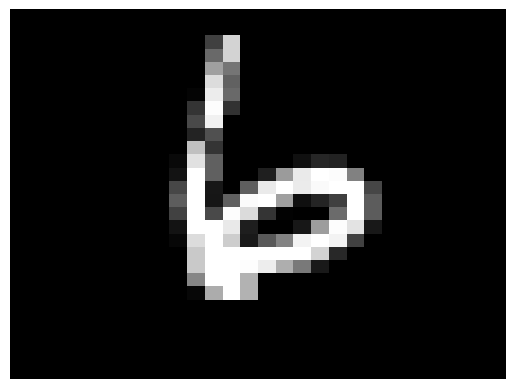

In [164]:
prediction = model.predict(x_test[1299].reshape(1,784))
prediction_p = tf.nn.softmax(prediction)
print(prediction)
print(np.argmax(prediction_p))
result = x_test[1299].reshape(28,28)
plt.imshow(result, cmap='gray', aspect='auto')
plt.axis('off')  # Turn off axis labels
plt.show()